In [27]:
import numpy as np

from hmmlearn.hmm import GaussianHMM

from matplotlib import cm, pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.dates import YearLocator, MonthLocator

from loaders import DataLoader

In [84]:
df = DataLoader.load('ibm', sampling='1W', feature_sampling=1)

In [85]:
df.tail()

,Date,Open,High,Low,Close,ln_Close,shadow_up,shadow_down,hl_ratio,oc_diff,...,MA200,EWMA8,EWMA20,MACD,BB_high,BB_low,RSI,VOL8,VOL20,target
1103,2021-02-28,118.50,124.35,118.440,118.93,-0.000504,5.42,0.060,1.049899,-0.43,...,136.95830,120.960980,121.848954,0.887974,131.342144,111.538856,45.734962,48.671798,52.817822,1.0
1104,2021-03-07,120.35,123.75,118.755,122.83,0.032266,0.92,1.595,1.042061,-2.48,...,136.79720,121.376318,121.942387,0.566069,130.986251,111.584749,50.686862,50.598172,53.794189,1.0
1105,2021-03-14,123.10,128.64,122.880,127.61,0.038177,1.03,0.220,1.046875,-4.51,...,136.68340,122.761580,122.482160,-0.279421,131.624342,112.107658,55.963867,54.944690,47.195606,1.0
1106,2021-03-21,127.77,130.99,127.340,128.90,0.010058,2.09,0.430,1.028663,-1.13,...,136.56800,124.125674,123.093383,-1.032291,131.704856,113.751144,57.285542,32.761602,45.353780,1.0
1107,2021-03-28,128.50,136.48,127.890,136.38,0.056408,0.10,0.610,1.067167,-7.88,...,136.48745,126.848857,124.358775,-2.490083,133.778629,113.911371,63.998465,45.497715,49.008527,-1.0


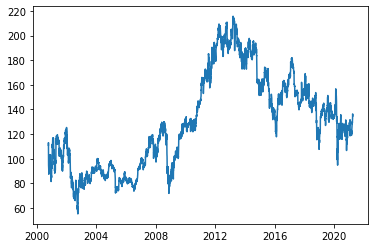

In [79]:
plt.plot(df['Date'], df['Close'])

In [86]:
hmm_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)
hmm_model.fit(df['ln_Close'].to_numpy().reshape(-1, 1))
print("Model Score:", hmm_model.score(df['ln_Close'].to_numpy().reshape(-1, 1)))

Model Score: 1961.8464741778712


In [87]:
def plot_in_sample_hidden_states(hmm_model, df):
    hidden_states = hmm_model.predict(df['ln_Close'].to_numpy().reshape(-1, 1))
    fig, axs = plt.subplots(
        hmm_model.n_components,
        sharex=True, sharey=True,
        figsize=(10, 8)
    )
    colours = cm.rainbow(
        np.linspace(0, 1, hmm_model.n_components)
    )
    for i, (ax, colour) in enumerate(zip(axs, colours)):
        mask = hidden_states == i
        ax.plot_date(
            df['Date'][mask],
            df['Close'][mask],
            ".", 
            linestyle='none',
            c=colour)

    ax.set_title("Hidden State #%s" % i)
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    ax.grid(True)

    plt.show()

    return hidden_states

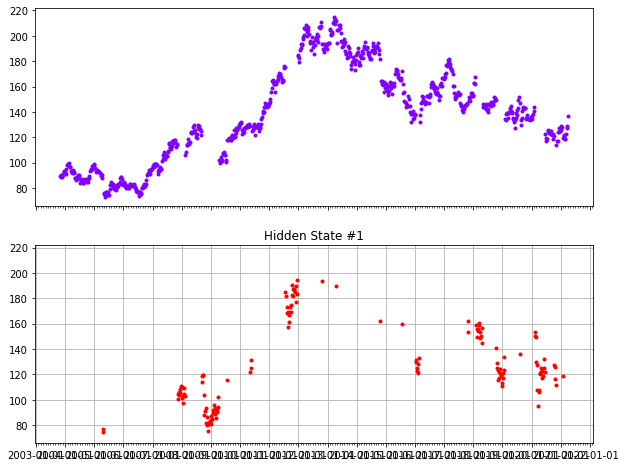

In [88]:
states = plot_in_sample_hidden_states(hmm_model, df)

In [76]:
chg = np.diff(states)
len(chg[chg != 0])

115